# Análisis Descriptivo

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.utils import shuffle
%matplotlib inline

In [54]:
#pd.options.display.max_columns = None

attrition = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition = shuffle(attrition)
attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
905,29,No,Travel_Rarely,694,Research & Development,1,3,Life Sciences,1,1264,...,2,80,2,9,2,2,7,7,1,7
1356,41,No,Travel_Rarely,337,Sales,8,3,Marketing,1,1909,...,3,80,1,14,3,3,5,4,1,4
1352,44,No,Travel_Rarely,170,Research & Development,1,4,Life Sciences,1,1903,...,4,80,1,10,5,3,2,0,2,2
1375,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,1939,...,1,80,0,8,2,3,4,1,0,3
672,42,No,Travel_Rarely,462,Sales,14,2,Medical,1,936,...,1,80,0,10,6,3,5,4,0,3


Análisis exploratorio de los datos 

 

Procedencia de los datos 

 

La base de datos utilizada es propiedad de la empresa IBM. Consta de 1470 registros y 35 variables, incluida la variable de interés. El objetivo de la base de datos, es servir como instrumento para predecir la deserción de colaboradores a partir de características personales y profesionales.

In [55]:
attrition.isna().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

A partir de la comprobación de integridad de la base de datos se descartó la existencia de valores nulos o faltantes.

 

Variable de interés 

 

Attrition: corresponde a una variable binaria, la cual indica si el empleado abandonó la empresa o no (Yes, No). 

<AxesSubplot:ylabel='Attrition'>

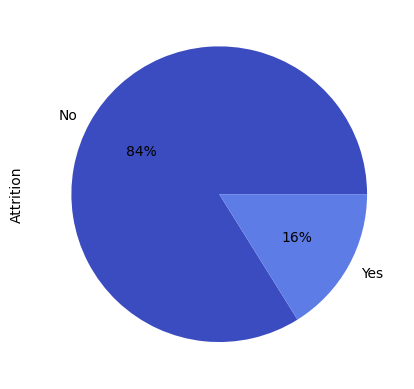

In [56]:
attrition.Attrition.value_counts().plot(kind='pie', autopct='%1.0f%%') 

A partir de la figura se observa que de los 1470 registros de la base de datos, la cantidad de colaboradores que no tienen intención de desertar tiene mayor representación con un porcentaje del 84%; mientras que la categoría de interés (colaboradores que tienen intensión de desertar) representa únicamente el 16%. Lo anterior evidencia que el conjunto de datos se encuentra desbalanceado, con menor representación de la categoría que se quiere predecir, lo que puede resultar en un problema en el rendimiento de los modelos de predicción, ya que la categoría minoritaria puede ser mayormente ignorada, lo cual limitaría la aplicación del modelo para predecir la deserción de los colaboradores de la empresa.


In [57]:
attrition.Gender.describe()

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

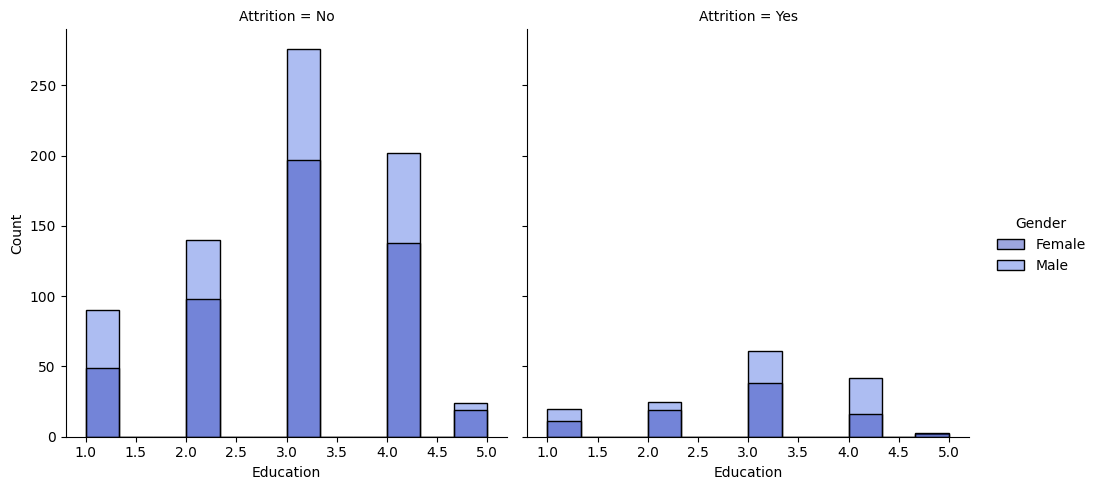

In [58]:
import seaborn as sns
sns.displot(data = attrition, x = "Education", hue = "Gender", col = "Attrition")

Independientemente del grado de educación de los colaboradores las personas que más rotan en la empresa son las mujeres.


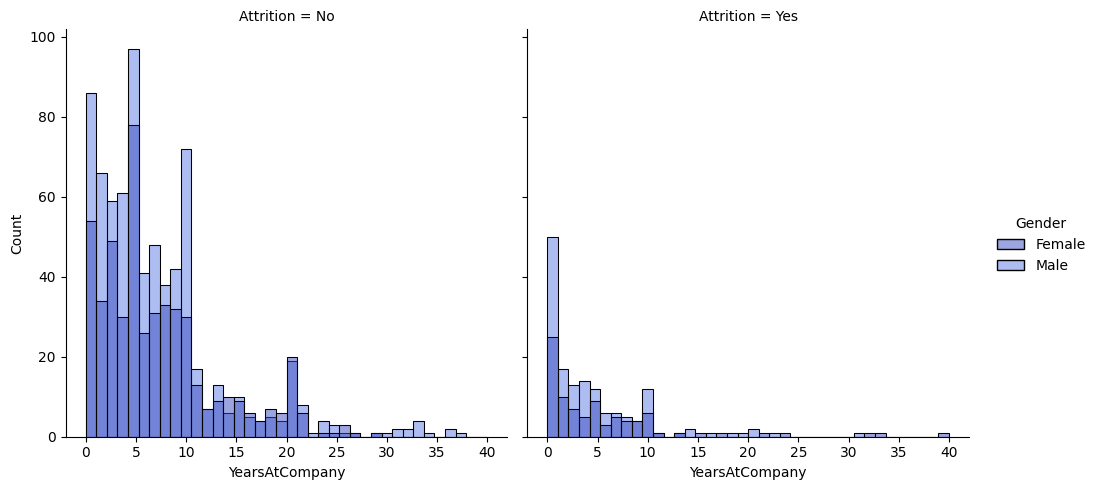

In [59]:
sns.displot(data = attrition, x = "YearsAtCompany", hue = "Gender", col = "Attrition")

Teniendo en cuenta los años en la empresa los colaboradores que más rotan tienen una antigüedad entre 0 y 5 años.

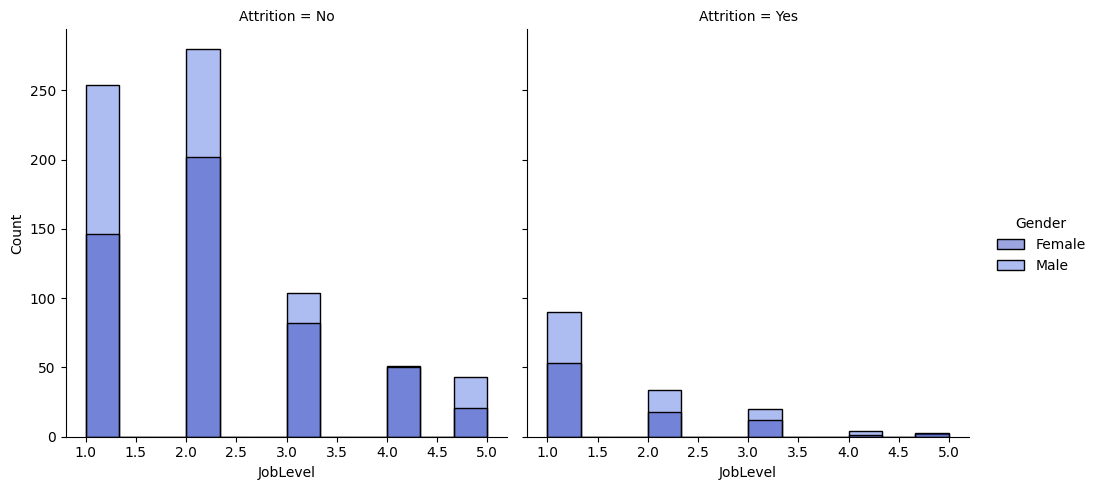

In [60]:
sns.displot(data = attrition, x = "JobLevel", hue = "Gender", col = "Attrition")

Los colaboradores con mas bajo nivel en la empresa son los que mayoremente rotan.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'DailyRate'),
  Text(2.5, 0, 'DistanceFromHome'),
  Text(3.5, 0, 'Education'),
  Text(4.5, 0, 'EmployeeCount'),
  Text(5.5, 0, 'EmployeeNumber'),
  Text(6.5, 0, 'EnvironmentSatisfaction'),
  Text(7.5, 0, 'HourlyRate'),
  Text(8.5, 0, 'JobInvolvement'),
  Text(9.5, 0, 'JobLevel'),
  Text(10.5, 0, 'JobSatisfaction'),
  Text(11.5, 0, 'MonthlyIncome'),
  Text(12.5, 0, 'MonthlyRate'),
  Text(13.5, 0, 'NumCompaniesWorked'),
  Text(14.5, 0, 'PercentSalaryHike'),
  Text(15.5, 0, 'PerformanceRating'),
  Text(16.5, 0, 'RelationshipSatisfaction'),
  Text(17.5, 0, 'StandardHours'),
  Text(18.5, 0, 'StockOptionLevel'),
  Text(19.5, 0, 'TotalWorkingYears'),
  Text(20.5, 0, 'TrainingTimesLastYear'),
  Text(21.5, 0, 'WorkLifeBalance'),
  Text(22.5, 0, 'YearsAtCompany'),
  Text(23.5, 0,

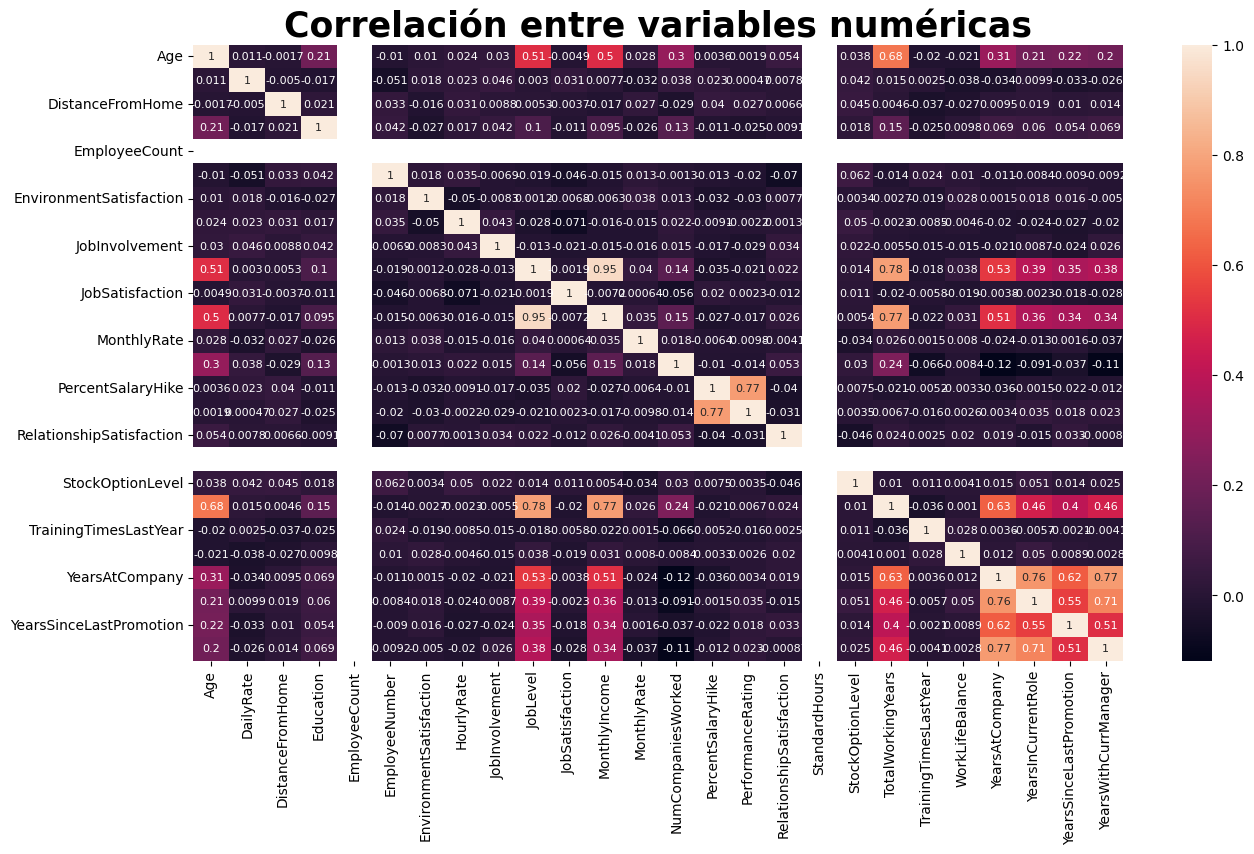

In [63]:
Numeric_data=pd.DataFrame(attrition.select_dtypes(include=['int64']))
Numeric_data

sns.heatmap(Numeric_data.corr(), annot=True, annot_kws={"size":8})
plt.title('Correlación entre variables numéricas', weight='bold', size=25, y=1)
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation=90)

In [62]:
corelation=Numeric_data.corr()
corr_pairs = corelation.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.6]
print(strong_pairs[[0,2,4,6,8,10,12,14,16,18]])

YearsSinceLastPromotion  YearsAtCompany        0.618409
YearsAtCompany           TotalWorkingYears     0.628133
TotalWorkingYears        Age                   0.680381
YearsWithCurrManager     YearsInCurrentRole    0.714365
YearsAtCompany           YearsInCurrentRole    0.758754
YearsWithCurrManager     YearsAtCompany        0.769212
MonthlyIncome            TotalWorkingYears     0.772893
PercentSalaryHike        PerformanceRating     0.773550
TotalWorkingYears        JobLevel              0.782208
JobLevel                 MonthlyIncome         0.950300
dtype: float64


A partir del grafico se observa la correlación entre variables. Monthly income,Job level esta altamente correlacionado con TotalWorkingYears y PerformanceRating está altamente correlacionado con PercentSalaryhike. Lo que se busca para la realización del modelo predictivo se busca que las variables no estén demasiado correlacionadas, con el fin de garantizar que no hay información redundante. En el caso que se tengan muchas variables correlacionadas entre si una opción es realizar análisis de componentes principales con el fin de la cantidad de variables.